./final_datasets/prop/

prop-1.csv 1


./final_datasets/prop/

prop-1.csv 2


./final_datasets/prop/

prop-1.csv 3


./final_datasets/prop/

prop-1.csv 4


./final_datasets/prop/

prop-1.csv 5


./final_datasets/prop/

prop-1.csv 6


./final_datasets/prop/

prop-1.csv 7


./final_datasets/prop/

prop-1.csv 8


./final_datasets/prop/

prop-1.csv 9


./final_datasets/prop/

prop-1.csv 10


Results are printed in below order.
accuracy, precision, recall, f1-score, auc, tp, fp, tn, fn
prop-1.csv
knn
0.7875 0.6469 0.7158 0.6645 0.7876 168.2 286.9 1287.1 105.8 
rf
0.749 0.6252 0.7036 0.6348 0.7796 175.1 365.0 1209.0 98.9 
dt
0.7972 0.6375 0.6769 0.6508 0.7543 138.6 239.4 1334.6 135.4 
nb
0.7995 0.6036 0.6036 0.6035 0.6879 89.1 185.6 1388.4 184.9 
lr
0.6863 0.5986 0.6809 0.589 0.7455 184.5 490.3 1083.7 89.5 




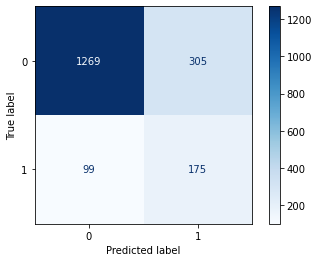

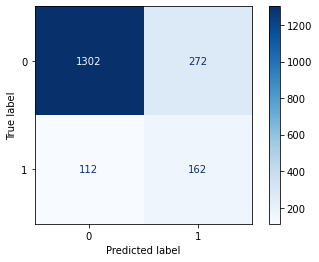

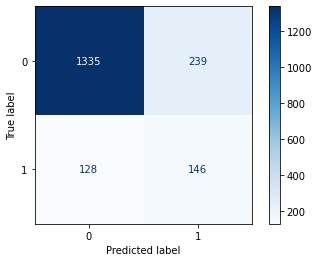

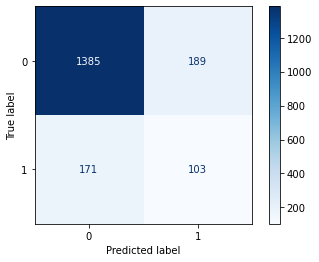

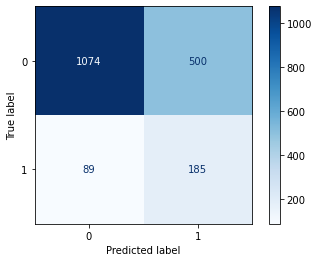

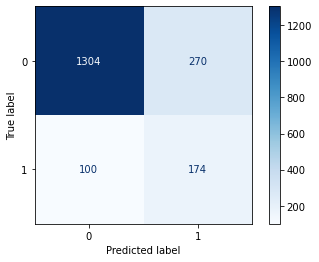

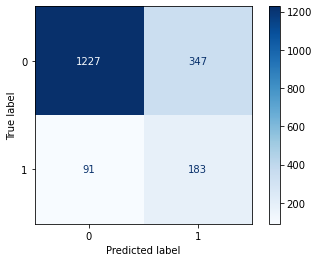

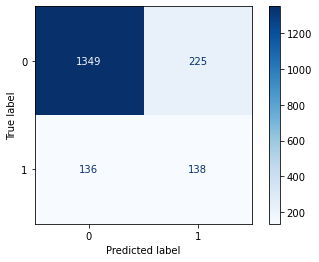

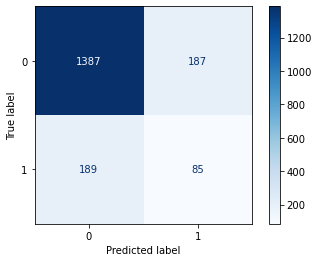

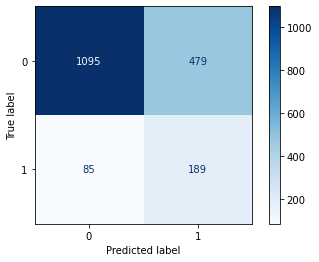

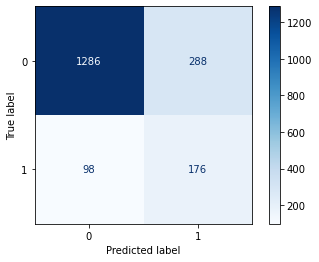

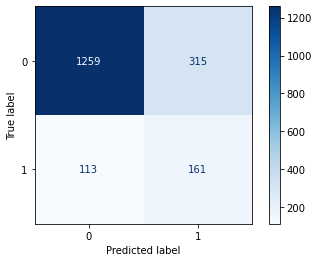

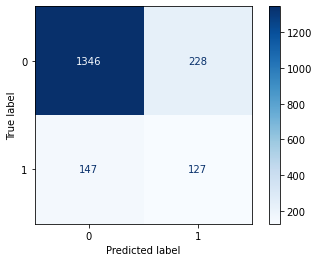

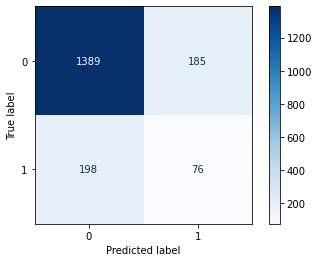

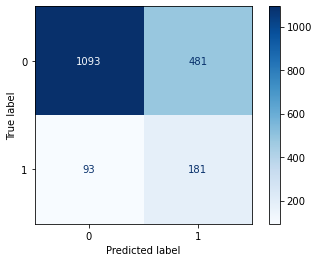

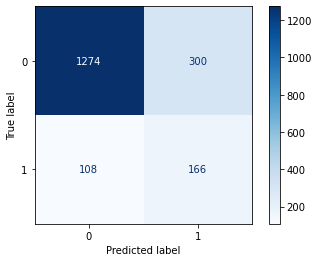

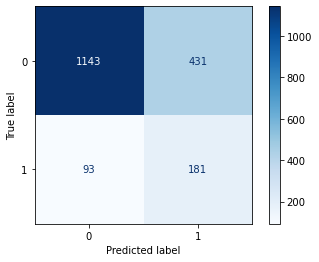

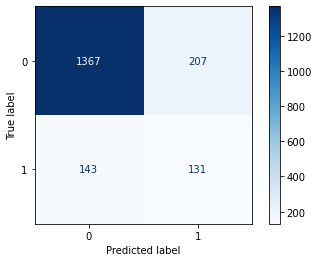

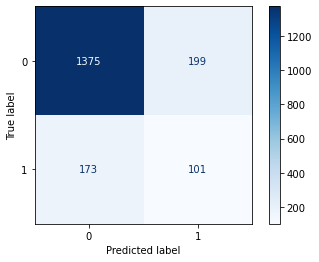

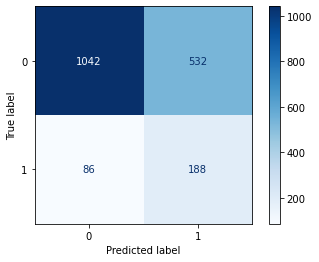

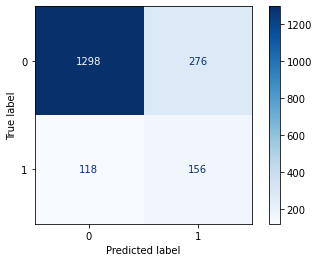

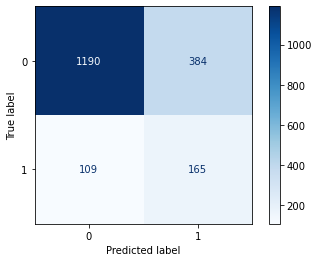

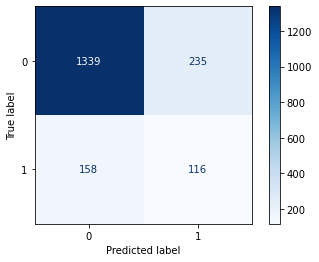

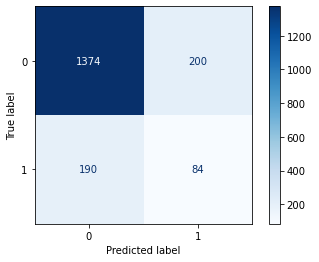

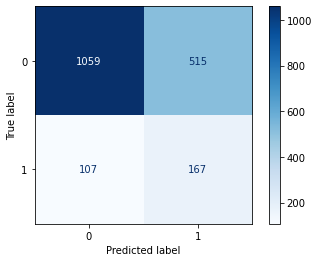

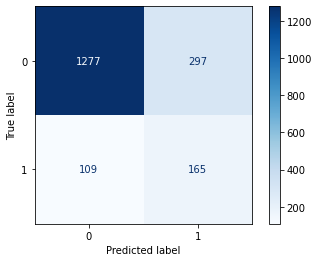

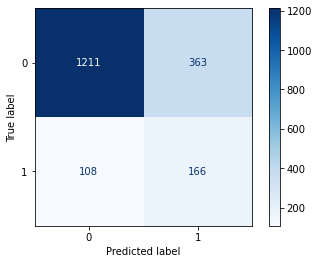

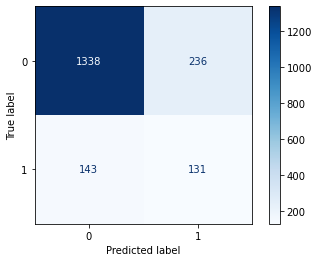

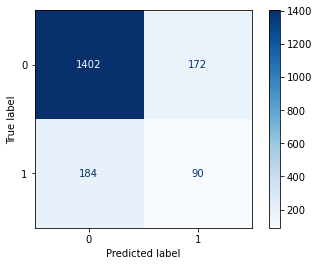

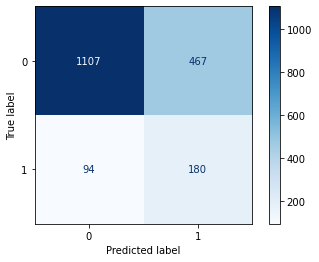

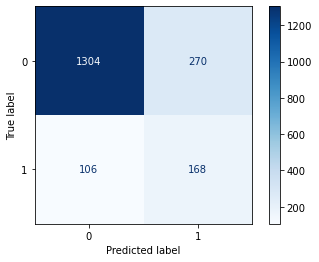

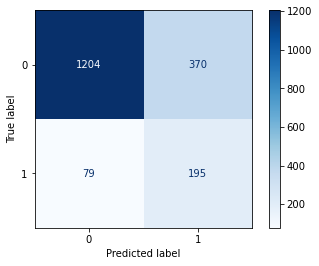

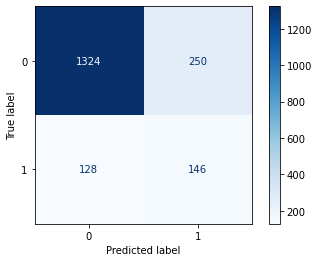

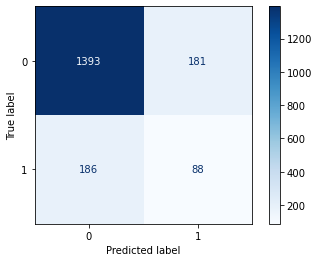

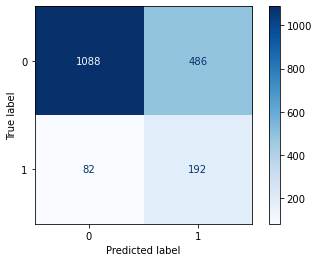

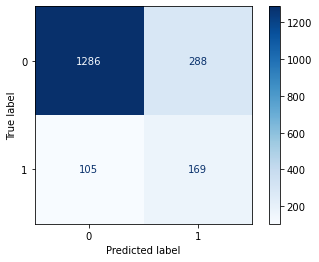

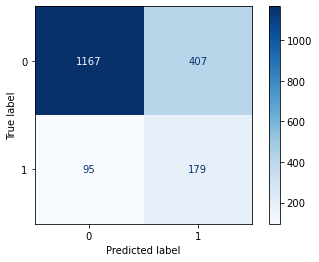

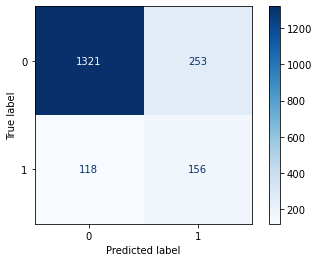

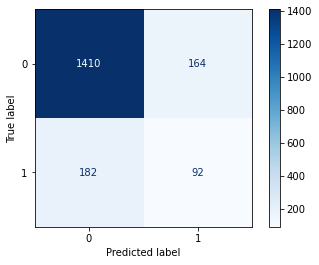

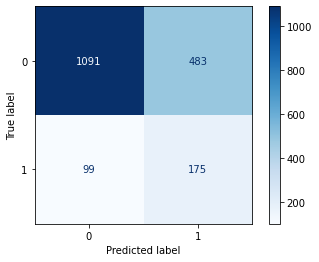

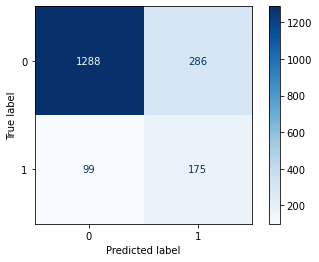

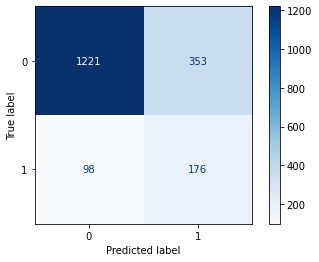

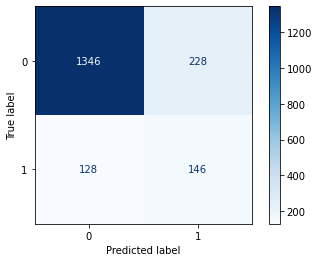

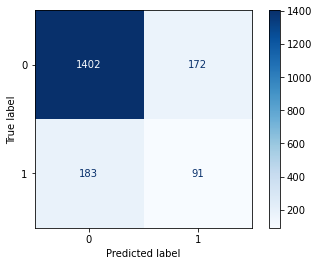

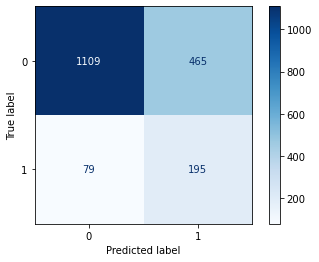

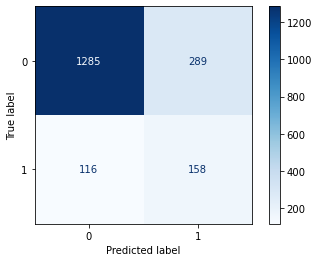

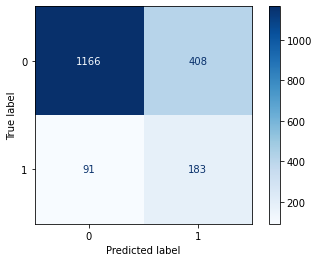

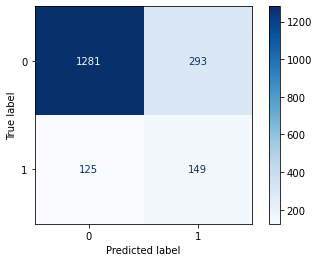

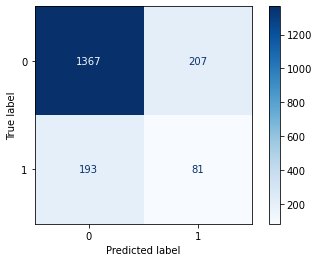

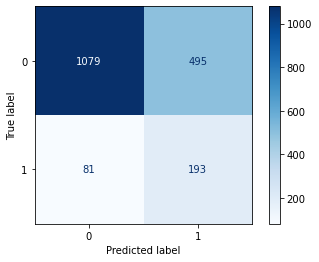

In [2]:
import os
from os import listdir
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE 
import tensorflow as tf
from sklearn.metrics import classification_report
import json
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

results = {}

def append_record(record):
    with open('./results/individual_results_smote.txt', 'w') as f:
        f.write(str(record))
        f.write(os.linesep)

path = "./final_datasets/prop/"
for name in os.listdir(path) :
  if name.endswith(".csv") :
    for i in range(10) :
      print(path)
      print()
      print(name, i+1)
      print()
      print()
      file = pd.read_csv(path+name, header=None)
      file.loc[file[file.columns[-1]]>=1, file.columns[-1]] = 1
      if i == 0:
        results[name] = {}
      results[name][i+1] = {"smote" : {}}

      y = file[file.columns[-1]]
      x = file.drop([file.columns[-1]], axis=1)
    
      le = preprocessing.LabelEncoder()
      le.fit(y)
      y = le.transform(y)
      y
      scaler = StandardScaler()
      x = np.asarray(x)
      x= scaler.fit_transform(x)
      
      train_x, test_x, train_y, test_y = tts(x, y, test_size=0.1, random_state=42*i, shuffle=True, stratify=y)
      train_y = np.resize(train_y, (train_y.shape[0], 1))
      train = np.concatenate([train_x, train_y], axis=1)
      train = pd.DataFrame(train)
      test_y = np.resize(test_y, (test_y.shape[0], 1))
      test = np.concatenate([test_x, test_y], axis=1)
      test = pd.DataFrame(test)
      train_path = path + "train/train_"+str(i+1)+"_"+name
      test_path = path + "test/test_"+str(i+1)+"_"+name
      train.to_csv(train_path, index=False, header=None)
      test.to_csv(test_path, index=False, header=None)
      
      smote = pd.read_csv(train_path, header=None)
      test = pd.read_csv(test_path, header=None)

      test_y = test[test.columns[-1]]
      test_x = test.drop([test.columns[-1]], axis=1)

      sm_y = smote[smote.columns[-1]]
      sm_x = smote.drop([smote.columns[-1]], axis=1)

      sm = SMOTE(random_state = 2) 
      smote_x, smote_y = sm.fit_sample(sm_x, sm_y) 

      clf = KNeighborsClassifier(5)
      clf.fit(smote_x, smote_y)
      pred_y = clf.predict(test_x)
      report = classification_report(test_y, pred_y, output_dict=True)
      disp = plot_confusion_matrix(clf, test_x, test_y,
                                    display_labels=[0, 1],
                                    cmap=plt.cm.Blues)
      precision = report['macro avg']['precision']
      recall = report['macro avg']['recall']
      score = report['accuracy']
      f1 = report['macro avg']['f1-score']
      auc = roc_auc_score(test_y, clf.predict_proba(test_x)[:, 1])

      tp = disp.confusion_matrix[1][1]
      fp = disp.confusion_matrix[0][1]
      fn = disp.confusion_matrix[1][0]
      tn = disp.confusion_matrix[0][0]
      results[name][i+1]["smote"]['knn'] = [score, precision, recall, f1, auc, tp, fp, tn, fn]

      clf = RandomForestClassifier(max_depth=5, n_estimators=10)
      clf.fit(smote_x, smote_y)
      pred_y = clf.predict(test_x)
      report = classification_report(test_y, pred_y, output_dict=True)
      disp = plot_confusion_matrix(clf, test_x, test_y,
                                    display_labels=[0, 1],
                                    cmap=plt.cm.Blues)
      precision = report['macro avg']['precision']
      recall = report['macro avg']['recall']
      score = report['accuracy']
      f1 = report['macro avg']['f1-score']
      auc = roc_auc_score(test_y, clf.predict_proba(test_x)[:, 1])

      tp = disp.confusion_matrix[1][1]
      fp = disp.confusion_matrix[0][1]
      fn = disp.confusion_matrix[1][0]
      tn = disp.confusion_matrix[0][0]
      results[name][i+1]["smote"]['rf'] = [score, precision, recall, f1, auc, tp, fp, tn, fn]


      clf = DecisionTreeClassifier(max_depth=5)
      clf.fit(smote_x, smote_y)
      pred_y = clf.predict(test_x)
      report = classification_report(test_y, pred_y, output_dict=True)
      disp = plot_confusion_matrix(clf, test_x, test_y,
                                    display_labels=[0, 1],
                                    cmap=plt.cm.Blues)
      precision = report['macro avg']['precision']
      recall = report['macro avg']['recall']
      score = report['accuracy']
      f1 = report['macro avg']['f1-score']
      auc = roc_auc_score(test_y, clf.predict_proba(test_x)[:, 1])

      tp = disp.confusion_matrix[1][1]
      fp = disp.confusion_matrix[0][1]
      fn = disp.confusion_matrix[1][0]
      tn = disp.confusion_matrix[0][0]
      results[name][i+1]["smote"]['dt'] = [score, precision, recall, f1, auc, tp, fp, tn, fn]


      clf = GaussianNB()
      clf.fit(smote_x, smote_y)
      pred_y = clf.predict(test_x)
      report = classification_report(test_y, pred_y, output_dict=True)
      disp = plot_confusion_matrix(clf, test_x, test_y,
                                    display_labels=[0, 1],
                                    cmap=plt.cm.Blues)
      precision = report['macro avg']['precision']
      recall = report['macro avg']['recall']
      score = report['accuracy']
      f1 = report['macro avg']['f1-score']
      auc = roc_auc_score(test_y, clf.predict_proba(test_x)[:, 1])

      tp = disp.confusion_matrix[1][1]
      fp = disp.confusion_matrix[0][1]
      fn = disp.confusion_matrix[1][0]
      tn = disp.confusion_matrix[0][0]
      results[name][i+1]["smote"]['nb'] = [score, precision, recall, f1, auc, tp, fp, tn, fn]


      clf = LogisticRegression()
      clf.fit(smote_x, smote_y)
      pred_y = clf.predict(test_x)
      report = classification_report(test_y, pred_y, output_dict=True)
      disp = plot_confusion_matrix(clf, test_x, test_y,
                                    display_labels=[0, 1],
                                    cmap=plt.cm.Blues)
      precision = report['macro avg']['precision']
      recall = report['macro avg']['recall']
      score = report['accuracy']
      f1 = report['macro avg']['f1-score']
      auc = roc_auc_score(test_y, clf.predict_proba(test_x)[:, 1])

      tp = disp.confusion_matrix[1][1]
      fp = disp.confusion_matrix[0][1]
      fn = disp.confusion_matrix[1][0]
      tn = disp.confusion_matrix[0][0]
      results[name][i+1]["smote"]['lr'] = [score, precision, recall, f1, auc, tp, fp, tn, fn]
      append_record(results)

dict1 = results
results = {}

nan = 0
for nam in dict1 :
    if(len(dict1[nam]) < 10) :
        print("there are not 10 iterations for " + nam + ", hence, results will not be calculated for it")
        continue
    results[nam] = {"smote":{}}
    for itr in dict1[nam] :
          for typ in dict1[nam][itr] :
                for classifier in dict1[nam][itr][typ] :
                      if typ not in results[nam] :
                            results[nam][typ] = {}
                      if classifier not in results[nam][typ] :
                            results[nam][typ][classifier] = [[], [], [], [], [], [], [], [], []]

                      i = 0
                      for value in dict1[nam][itr][typ][classifier] :
                            results[nam][typ][classifier][i].append(value)
                            i += 1

final_results = {}
for name in results :
      final_results[name] = {"smote":{}}
      for typ in results[name] :
            for classifier in results[name][typ] :
                  final_results[name][typ][classifier] = []
                  for values in results[name][typ][classifier] :
                        final_results[name][typ][classifier].append(sum(values)/len(values))

with open('./results/averaged_results_smote.txt', 'w') as f:
    f.write(str(final_results))

print("Results are printed in below order.")
print("accuracy, precision, recall, f1-score, auc, tp, fp, tn, fn")
dict1 = final_results
for name in sorted(dict1) :
      print(name)
      for typ in dict1[name] :
            for classifier in dict1[name][typ] :
                  print(classifier)
                  for value in dict1[name][typ][classifier] :
                        print(round(value, 4), end = " ")
                  print()
            print()
      print()
